In [1]:
import sys
sys.path.append('/Users/nmontes/OneDrive/Documentos/PhD/ngames/ngames')
from extensivegames import plot_game
from build import build_full_game
from equilibrium import minimize_incentives, subgame_perfect_equilibrium

In [2]:
def set_utility(game):
    r"""Set the utility of the game at the terminal nodes.
    
    Set the utility at the terminal nodes to the payoff the agents have
    received. Other possibilities are possible (e.g. consider equality).
    """
    for n in game.game_tree.terminal_nodes:
        node_utility = {}
        facts = game.node_info[n]
        for f in facts:
            predicate = f.split('(')[0]
            args = f.split('(')[1][:-1].split(', ')
            if predicate == 'payoff':
                node_utility[args[0]] = float(args[1])
        game.set_utility(n, node_utility)

In [18]:
game = build_full_game('.', 'metanorms', threshold=0)
set_utility(game)

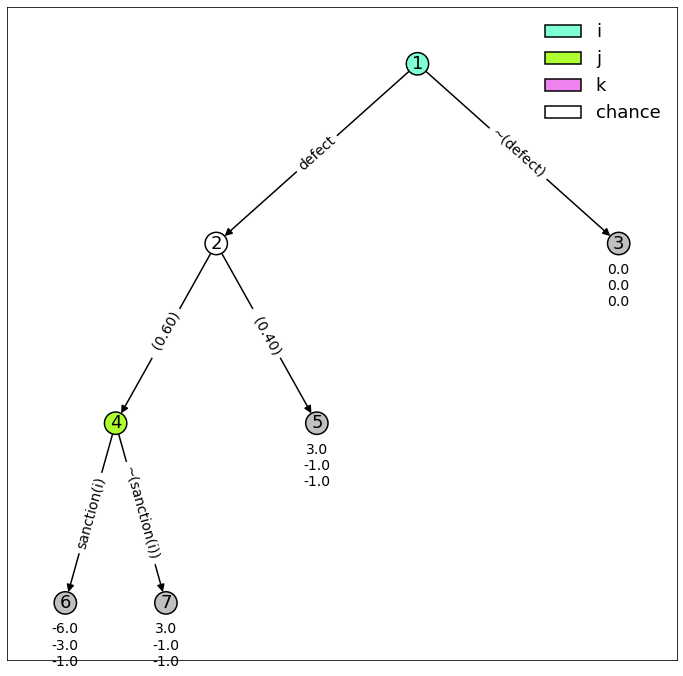

In [19]:
my_fig_kwargs = dict(figsize=(12, 12), frameon=False)
my_node_kwargs = dict(font_size=18, node_size=500, edgecolors='k',
                      linewidths=1.5)
my_edge_kwargs = dict(arrowsize=15, width=1.5)
my_edge_labels_kwargs = dict(font_size=14)
my_patch_kwargs = dict(linewidth=1.5)
my_legend_kwargs = dict(fontsize=18, loc='upper right', edgecolor='white')
my_utility_label_kwargs = dict(horizontalalignment='center', fontsize=14)
my_info_sets_kwargs = dict(linestyle='--', linewidth=1.5)

position_colors =  {'i':'aquamarine', 'j':'greenyellow', 'k':'violet'}

fig = plot_game(game,
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.07,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('axelrod_norms.png', bbox_inches='tight', dpi=500)

In [20]:
for n, f in game.node_info.items():
    print("{}: {}\n".format(n, f))

1: ['payoff(i, 0)', 'payoff(j, 0)', 'payoff(k, 0)', 'time(0)']

4: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'seen(j, i)', 'time(1.0)']

5: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'time(1.0)', '~(seen(j, i))']

3: ['payoff(i, 0)', 'payoff(j, 0)', 'payoff(k, 0)', 'time(1.0)']

6: ['payoff(i, -6.0)', 'payoff(j, -3.0)', 'payoff(k, -1.0)', 'time(2.0)']

7: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'time(2.0)']



In [21]:
subgame_mixed_strat, back_utilities, incentives = subgame_perfect_equilibrium(game, minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print()

At node 4: f(s)=0.000
i: {'no-op': 1.0}
j: {'sanction(i)': 0.0, '~(sanction(i))': 1.0}
k: {'no-op': 1.0}

At node 1: f(s)=0.000
i: {'defect': 1.0, '~(defect)': 0.0}
j: {'no-op': 1.0}
k: {'no-op': 1.0}



In [22]:
game = build_full_game('.', 'metanorms', threshold=1)
set_utility(game)

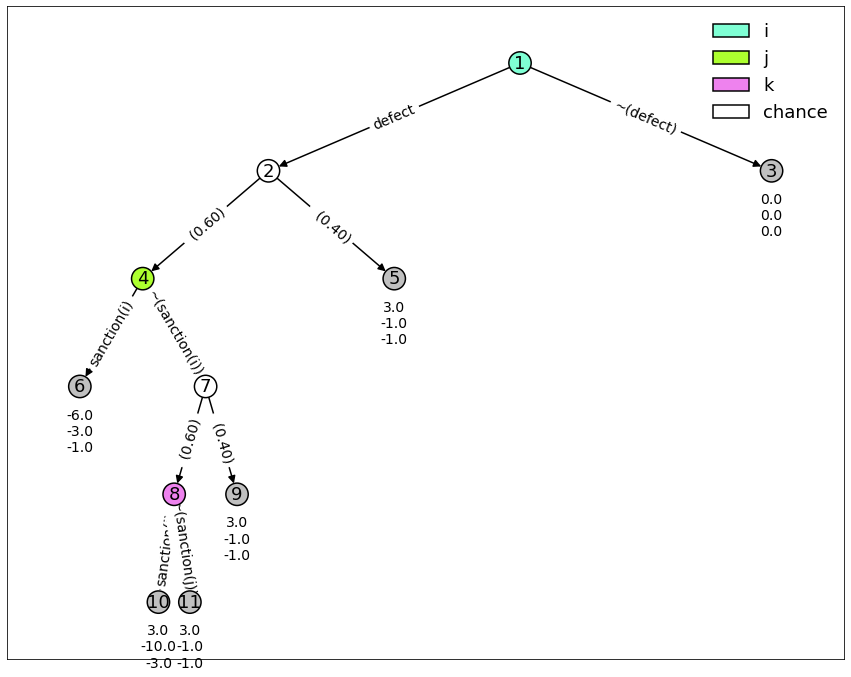

In [26]:
# default keywords for rendering the figure
my_fig_kwargs = dict(figsize=(15, 12), frameon=False)

fig = plot_game(game,
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.12,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('axelrod_metanorms.png', bbox_inches='tight', edgecolor=None)

In [27]:
for n, f in game.node_info.items():
    print("{}: {}\n".format(n, f))

1: ['payoff(i, 0)', 'payoff(j, 0)', 'payoff(k, 0)', 'time(0)']

4: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'seen(j, i)', 'time(1.0)']

5: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'time(1.0)', '~(seen(j, i))']

3: ['payoff(i, 0)', 'payoff(j, 0)', 'payoff(k, 0)', 'time(1.0)']

6: ['payoff(i, -6.0)', 'payoff(j, -3.0)', 'payoff(k, -1.0)', 'time(2.0)']

8: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'seen(k, j)', 'time(2.0)']

9: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'time(2.0)', '~(seen(k, j))']

10: ['payoff(i, 3.0)', 'payoff(j, -10.0)', 'payoff(k, -3.0)', 'time(3.0)']

11: ['payoff(i, 3.0)', 'payoff(j, -1.0)', 'payoff(k, -1.0)', 'time(3.0)']



In [28]:
subgame_mixed_strat, back_utilities, incentives = subgame_perfect_equilibrium(game, minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print()

At node 8: f(s)=0.000
i: {'no-op': 1.0}
j: {'no-op': 1.0}
k: {'sanction(j)': 0.0, '~(sanction(j))': 1.0}

At node 4: f(s)=0.000
i: {'no-op': 1.0}
j: {'sanction(i)': 3.552713678800501e-15, '~(sanction(i))': 0.9999999999999966}
k: {'no-op': 1.0}

At node 1: f(s)=0.000
i: {'defect': 0.9999999999998407, '~(defect)': 1.5931700403370996e-13}
j: {'no-op': 1.0}
k: {'no-op': 1.0}

